# Similarity
 1. Calculate Mutual Information ([Kullback - Leibler Divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence)) between each pair of senators *and* betwen each senators and the outcome. 
 2. Metricize mutual information. There is not a consistent naming scheme in the literature.. 
 3. Now do unsupervised clustering (agglomerative clustering), visualize with dendrogram. 
 4. Network analysis
 

In [1]:
#calculate mutual information for all of the senators in the dataset and with the outcome

import pandas as pd
import numpy as np

#clustering
from sklearn.metrics import mutual_info_score
from scipy.spatial.distance import pdist # will calcualte a distance matrix given a supplied defined distance metric
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet # will allow for custom clustering based on our distance metric
np.set_printoptions(precision=5, suppress=True) # truncate printed floats
import matplotlib.pyplot as plt
plt.style.use('ggplot')

#show images inline
from IPython.display import Image

In [2]:
votes = pd.read_csv('../data/cleaned_votes.csv', index_col=0)
senators = votes.iloc[:, :-1].columns.tolist()
vals = votes.iloc[:, :-1].values.T
print (vals.shape)

(100, 438)


## Mutual Informaion (Kullback - Leibler Divergence) Metric

In [3]:
# calculate the mutual information

def calc_MI(x, y, bins):
    c_xy = np.histogram2d(x, y, bins)[0]
    mi = mutual_info_score(None, None, contingency=c_xy)
    return mi

# calculate entropy
def entropy(X, Y):
    probs = []
    for c1 in set(X):
        for c2 in set(Y):
            probs.append(np.mean(np.logical_and(X == c1, Y == c2)))

    return np.sum(-p * np.log2(p) for p in probs if p > 0)

def r_dist(x,y):
    return (1 - ((calc_MI(x,y,100))/entropy(x,y)))

In [4]:
# our distance matrix
dm = pdist(vals, r_dist)

Z = linkage(vals, metric=r_dist)

c, coph = cophenet(Z, dm)
print (c)

0.95436302082


In [5]:
Z[:10]

array([[  12.     ,   67.     ,    0.42671,    2.     ],
       [  25.     ,   75.     ,    0.47155,    2.     ],
       [  44.     ,   73.     ,    0.49657,    2.     ],
       [  71.     ,   87.     ,    0.50145,    2.     ],
       [  82.     ,  102.     ,    0.52206,    3.     ],
       [   2.     ,   35.     ,    0.52464,    2.     ],
       [  37.     ,  104.     ,    0.53394,    4.     ],
       [  96.     ,  106.     ,    0.5371 ,    5.     ],
       [  14.     ,  107.     ,    0.54092,    6.     ],
       [  10.     ,  105.     ,    0.54517,    3.     ]])

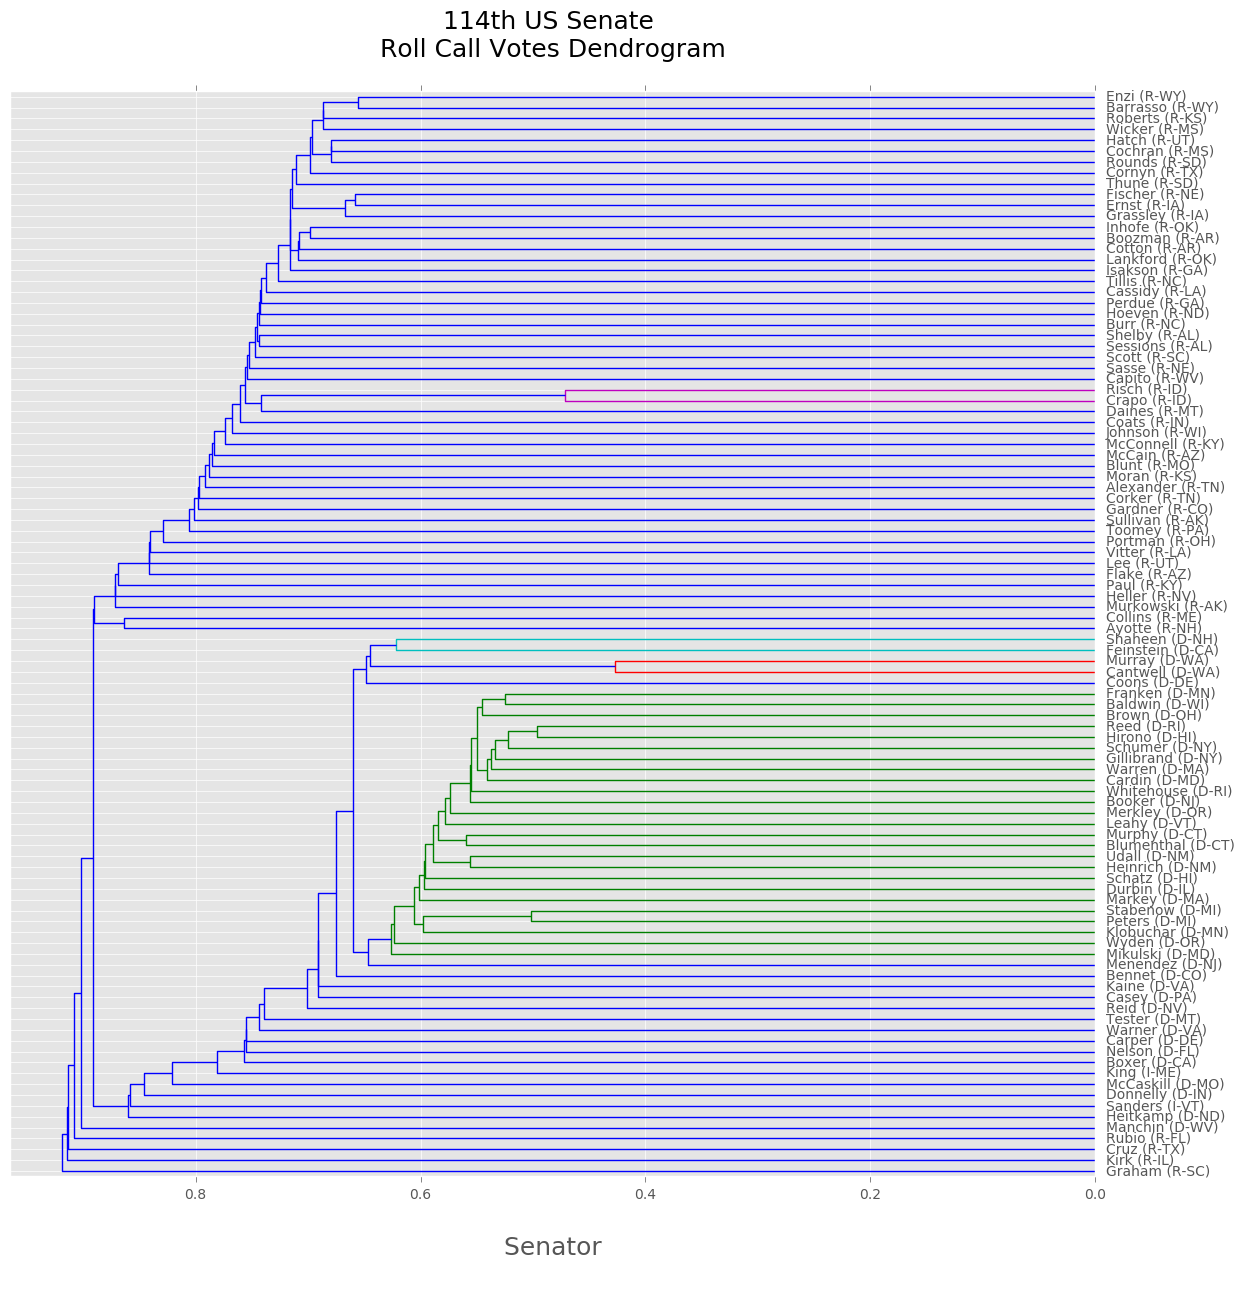

In [12]:
# calculate full dendrogram
plt.figure(figsize=(14, 14))
plt.title('114th US Senate \n Roll Call Votes Dendrogram \n', fontsize=18)
plt.xlabel('\n Senator \n ', fontsize=18)
plt.ylabel('')

dendrogram(
    Z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=10.,  # font size for the x axis labels
    orientation='left',
    labels=senators,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=700,  # show only the last p merged clusters
    show_contracted=True,  
    
)
plt.savefig('dendrogram.png')
plt.show()

### Calculate utual information between Senator and outcome

In [25]:
outcome_information = {} # create dict to store the values
outcomes = votes.iloc[:, -1:].values.reshape(438,)
for i, senator in enumerate(senators):
    outcome_information[senator] = calc_MI(vals[i], outcomes, 2)
otcs = pd.Series(outcome_information)
otcs = otcs.sort_values(ascending=False)

In [26]:
otcs[:20]

Cochran (R-MS)      0.165132
McConnell (R-KY)    0.163380
Alexander (R-TN)    0.155987
Hatch (R-UT)        0.146168
Capito (R-WV)       0.140117
Rounds (R-SD)       0.127858
Ayotte (R-NH)       0.114744
Isakson (R-GA)      0.105607
Cornyn (R-TX)       0.105307
Burr (R-NC)         0.105040
Tillis (R-NC)       0.104806
Collins (R-ME)      0.101992
Wicker (R-MS)       0.097869
Murkowski (R-AK)    0.097692
McCain (R-AZ)       0.093504
Kirk (R-IL)         0.093504
Johnson (R-WI)      0.092061
Gardner (R-CO)      0.091563
Hoeven (R-ND)       0.090228
Heitkamp (D-ND)     0.085496
dtype: float64

Republicans were clearly very influenctial on the outcome of the vote in the 114th US Senate. 

### senators

In [34]:
from sklearn.externals import joblib
joblib.dump(otcs, '../data/senators_by_influence.pkl')

['../data/senators_by_influence.pkl']

In [36]:
otcs[:20]

Cochran (R-MS)      0.165132
McConnell (R-KY)    0.163380
Alexander (R-TN)    0.155987
Hatch (R-UT)        0.146168
Capito (R-WV)       0.140117
Rounds (R-SD)       0.127858
Ayotte (R-NH)       0.114744
Isakson (R-GA)      0.105607
Cornyn (R-TX)       0.105307
Burr (R-NC)         0.105040
Tillis (R-NC)       0.104806
Collins (R-ME)      0.101992
Wicker (R-MS)       0.097869
Murkowski (R-AK)    0.097692
McCain (R-AZ)       0.093504
Kirk (R-IL)         0.093504
Johnson (R-WI)      0.092061
Gardner (R-CO)      0.091563
Hoeven (R-ND)       0.090228
Heitkamp (D-ND)     0.085496
dtype: float64

### states

In [28]:
votes.head()

Alexander (R-TN)  Ayotte (R-NH)  Baldwin (D-WI)  Barrasso (R-WY)  \
1                 0              0               1                0   
2                 1              1               1                1   
3                 1              1               0                1   
4                 1              1               0                1   
5                 1              1               0                1   

   Bennet (D-CO)  Blumenthal (D-CT)  Blunt (R-MO)  Booker (D-NJ)  \
1              0                  1             0              1   
2              1                  1             1              1   
3              1                  0             1              0   
4              0                  0             1              0   
5              0                  0             1              0   

   Boozman (R-AR)  Boxer (D-CA)   ...     Tillis (R-NC)  Toomey (R-PA)  \
1               0             0   ...                 0              0   
2               1             0   ...                 1              1   
3               1             0   ...                 1              1   
4               1             0   ...                 1              1   
5               1             0   ...                 1              1   

   Udall (D-NM)  Vitter (R-LA)  Warner (D-VA)  Warren (D-MA)  \
1             1              0              1              1   
2             1              1              1              0   
3             1              1              1              0   
4             0              1              1              0   
5             0              1              0              0   

   Whitehouse (D-RI)  Wicker (R-MS)  Wyden (D-OR)  outcome  
1                  1              0             1        0  
2                  1              1             1        1  
3                  0              1             0        1  
4                  0              1             0        1  
5                  0              1             0        1  

[5 rows x 101 columns]

In [27]:
# first need to create a set of all the states

state_list = {}
for senator in votes.columns[1:-1]:
    #get the state
    state = str(senator)[-3:-1]

    #check if the state is already in the dict
    
    if state in list(state_list.keys()):

        state_list[state].append(senator) #if true, add the other senator
        
    else: #create a new entry
        state_list[state] = [senator]

## Network Analysis

In [22]:
import networkx as nx
import csv
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (30.0, 20.0)

In [23]:
nodes = senators.copy() #make the nodes

#make the edges
from itertools import combinations
pair_list = [list(x) for x in combinations(senators, 2)]
edges = []
for edge in pair_list:
    edges.append((edge[0], edge[1]))
    

In [24]:
#graph
senate = nx.Graph()
senate.add_nodes_from(nodes)
senate.add_edges_from(edges)

In [25]:
print (nx.info(senate))

Name: 
Type: Graph
Number of nodes: 100
Number of edges: 4950
Average degree:  99.0000


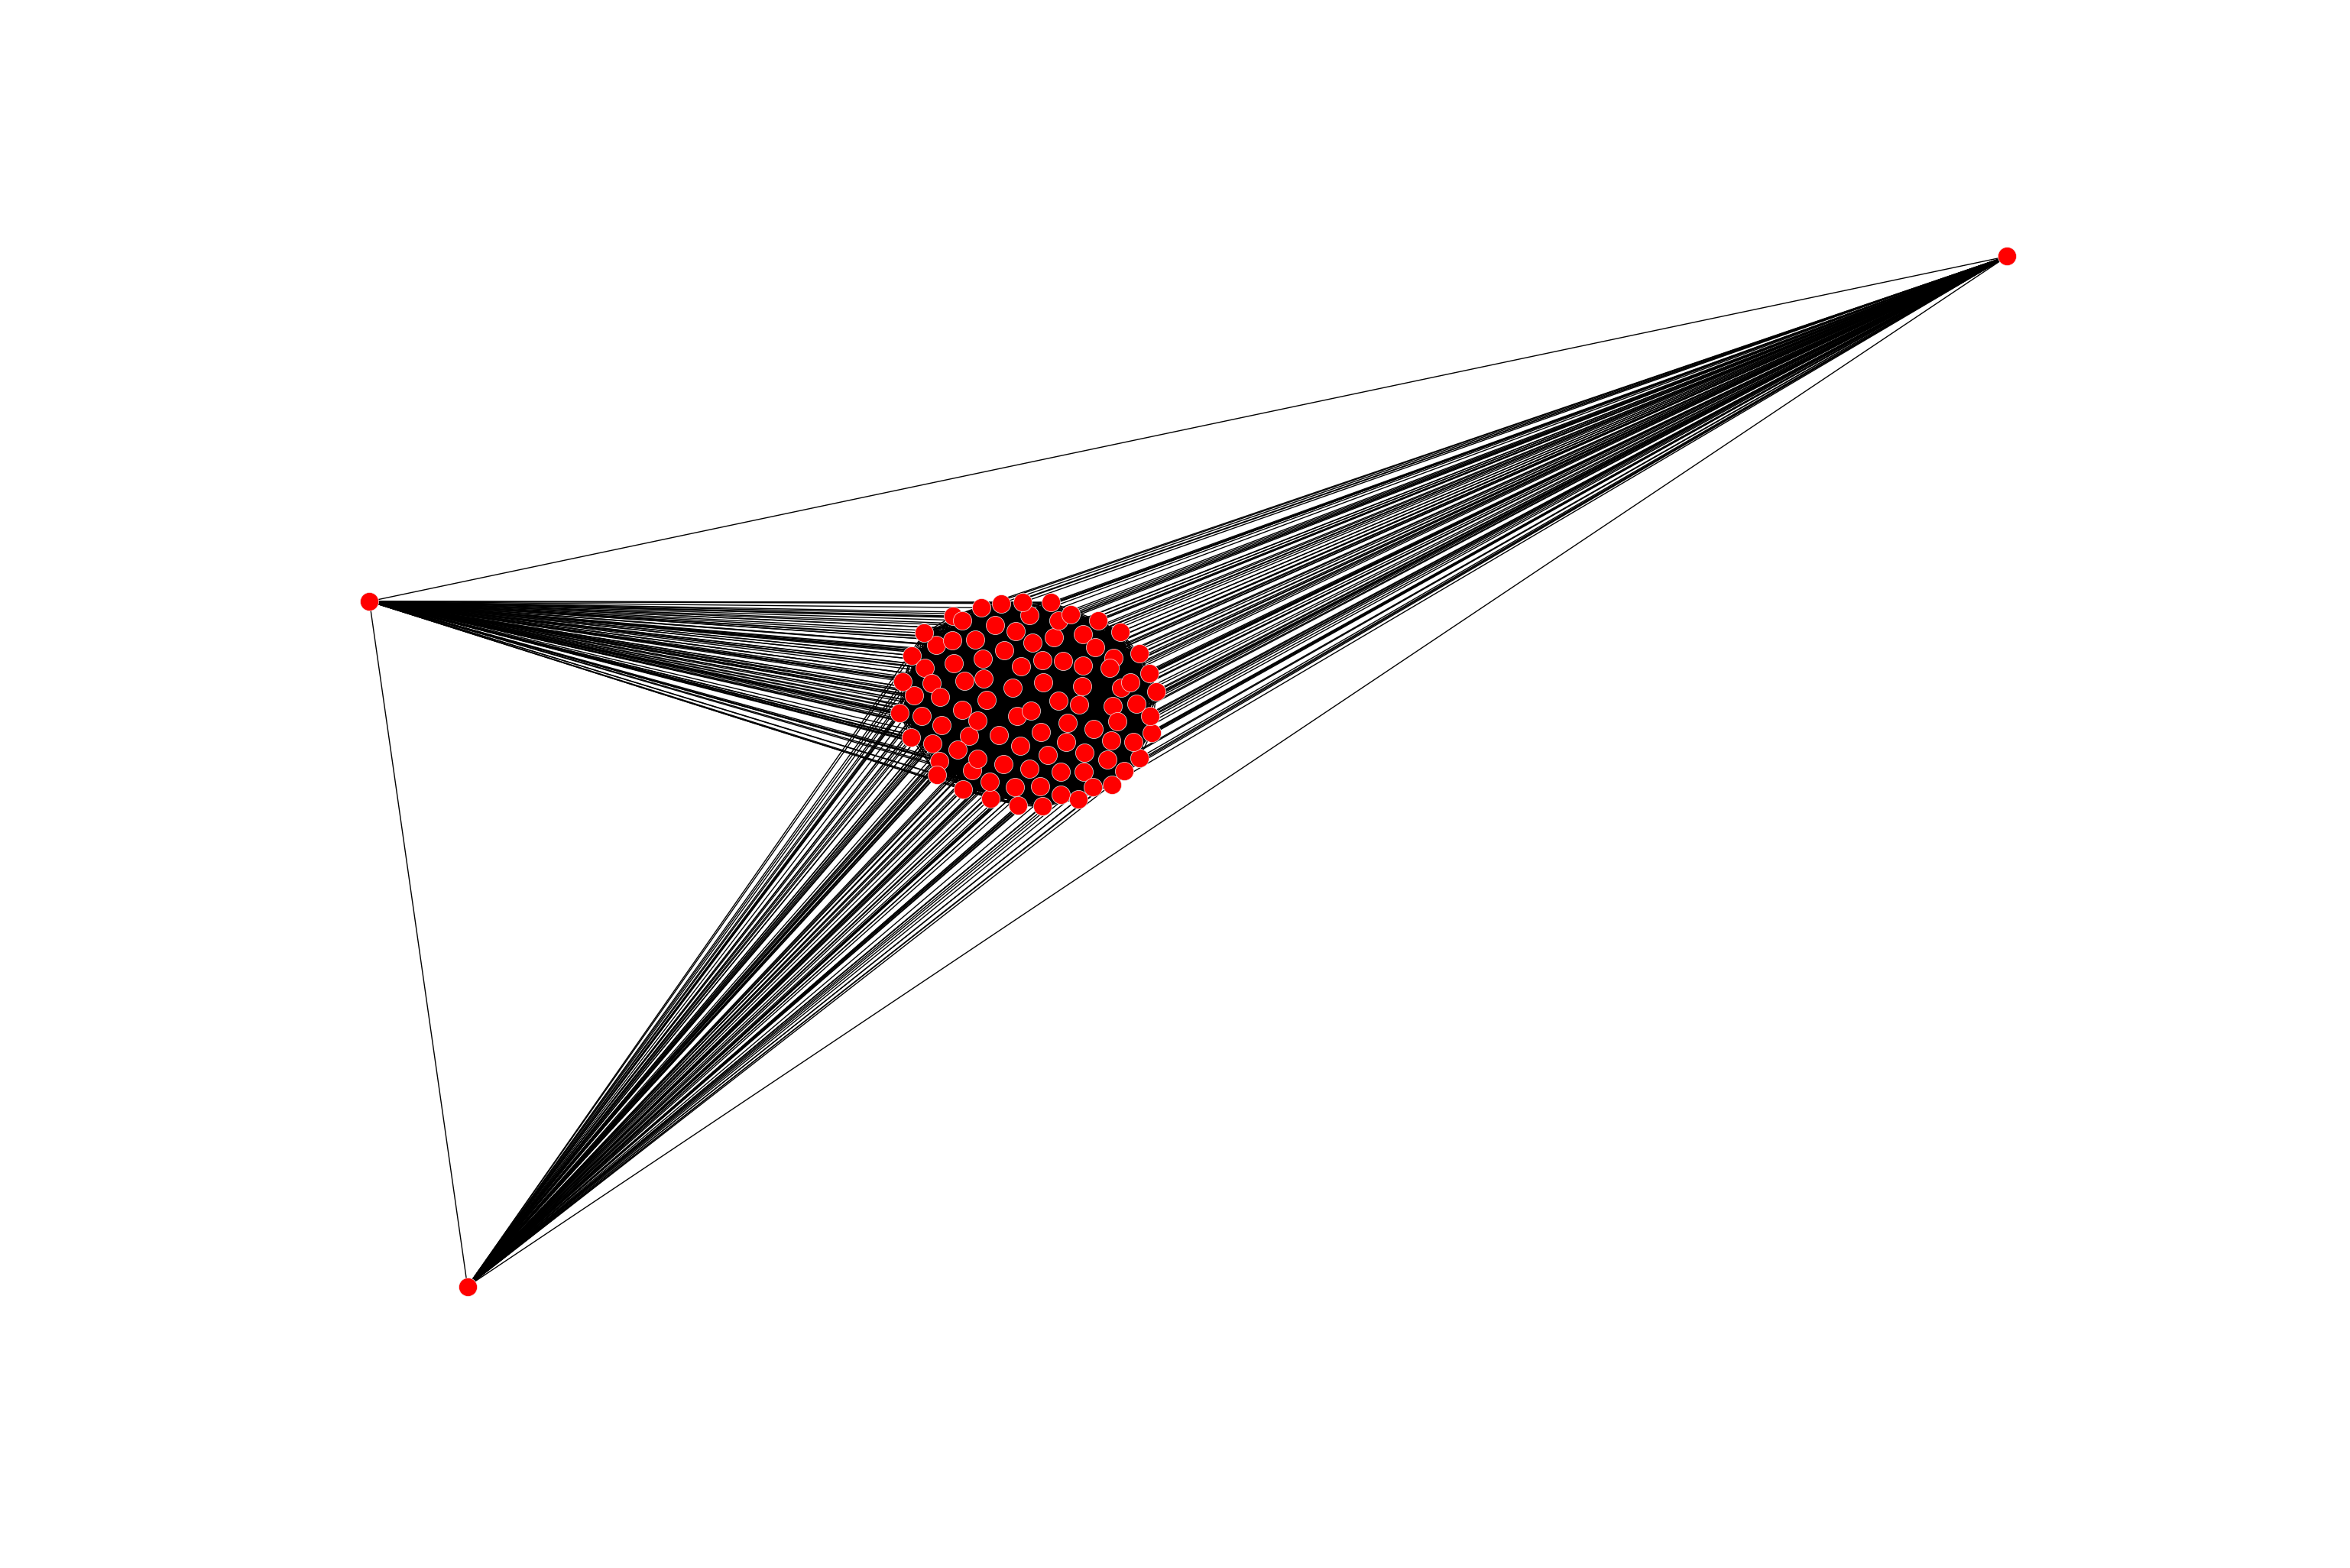

In [26]:
nx.draw(senate)

In [27]:
nx.is_connected(senate)

True

In [28]:
nx.number_connected_components(senate)

1

In [29]:
#look at senators of interest
senators_of_interest = [senators[0], senators[1], senators[44]]
senator_int_nodes = {}
for node in senate.nodes_iter(data=True):
    if node[0] in senators_of_interest:
        print (node)
        senator_int_nodes[node[0]] = node[0]

('Alexander (R-TN)', {})
('Hirono (D-HI)', {})
('Ayotte (R-NH)', {})


In [30]:
senator_int_nodes

{'Alexander (R-TN)': 'Alexander (R-TN)',
 'Ayotte (R-NH)': 'Ayotte (R-NH)',
 'Hirono (D-HI)': 'Hirono (D-HI)'}

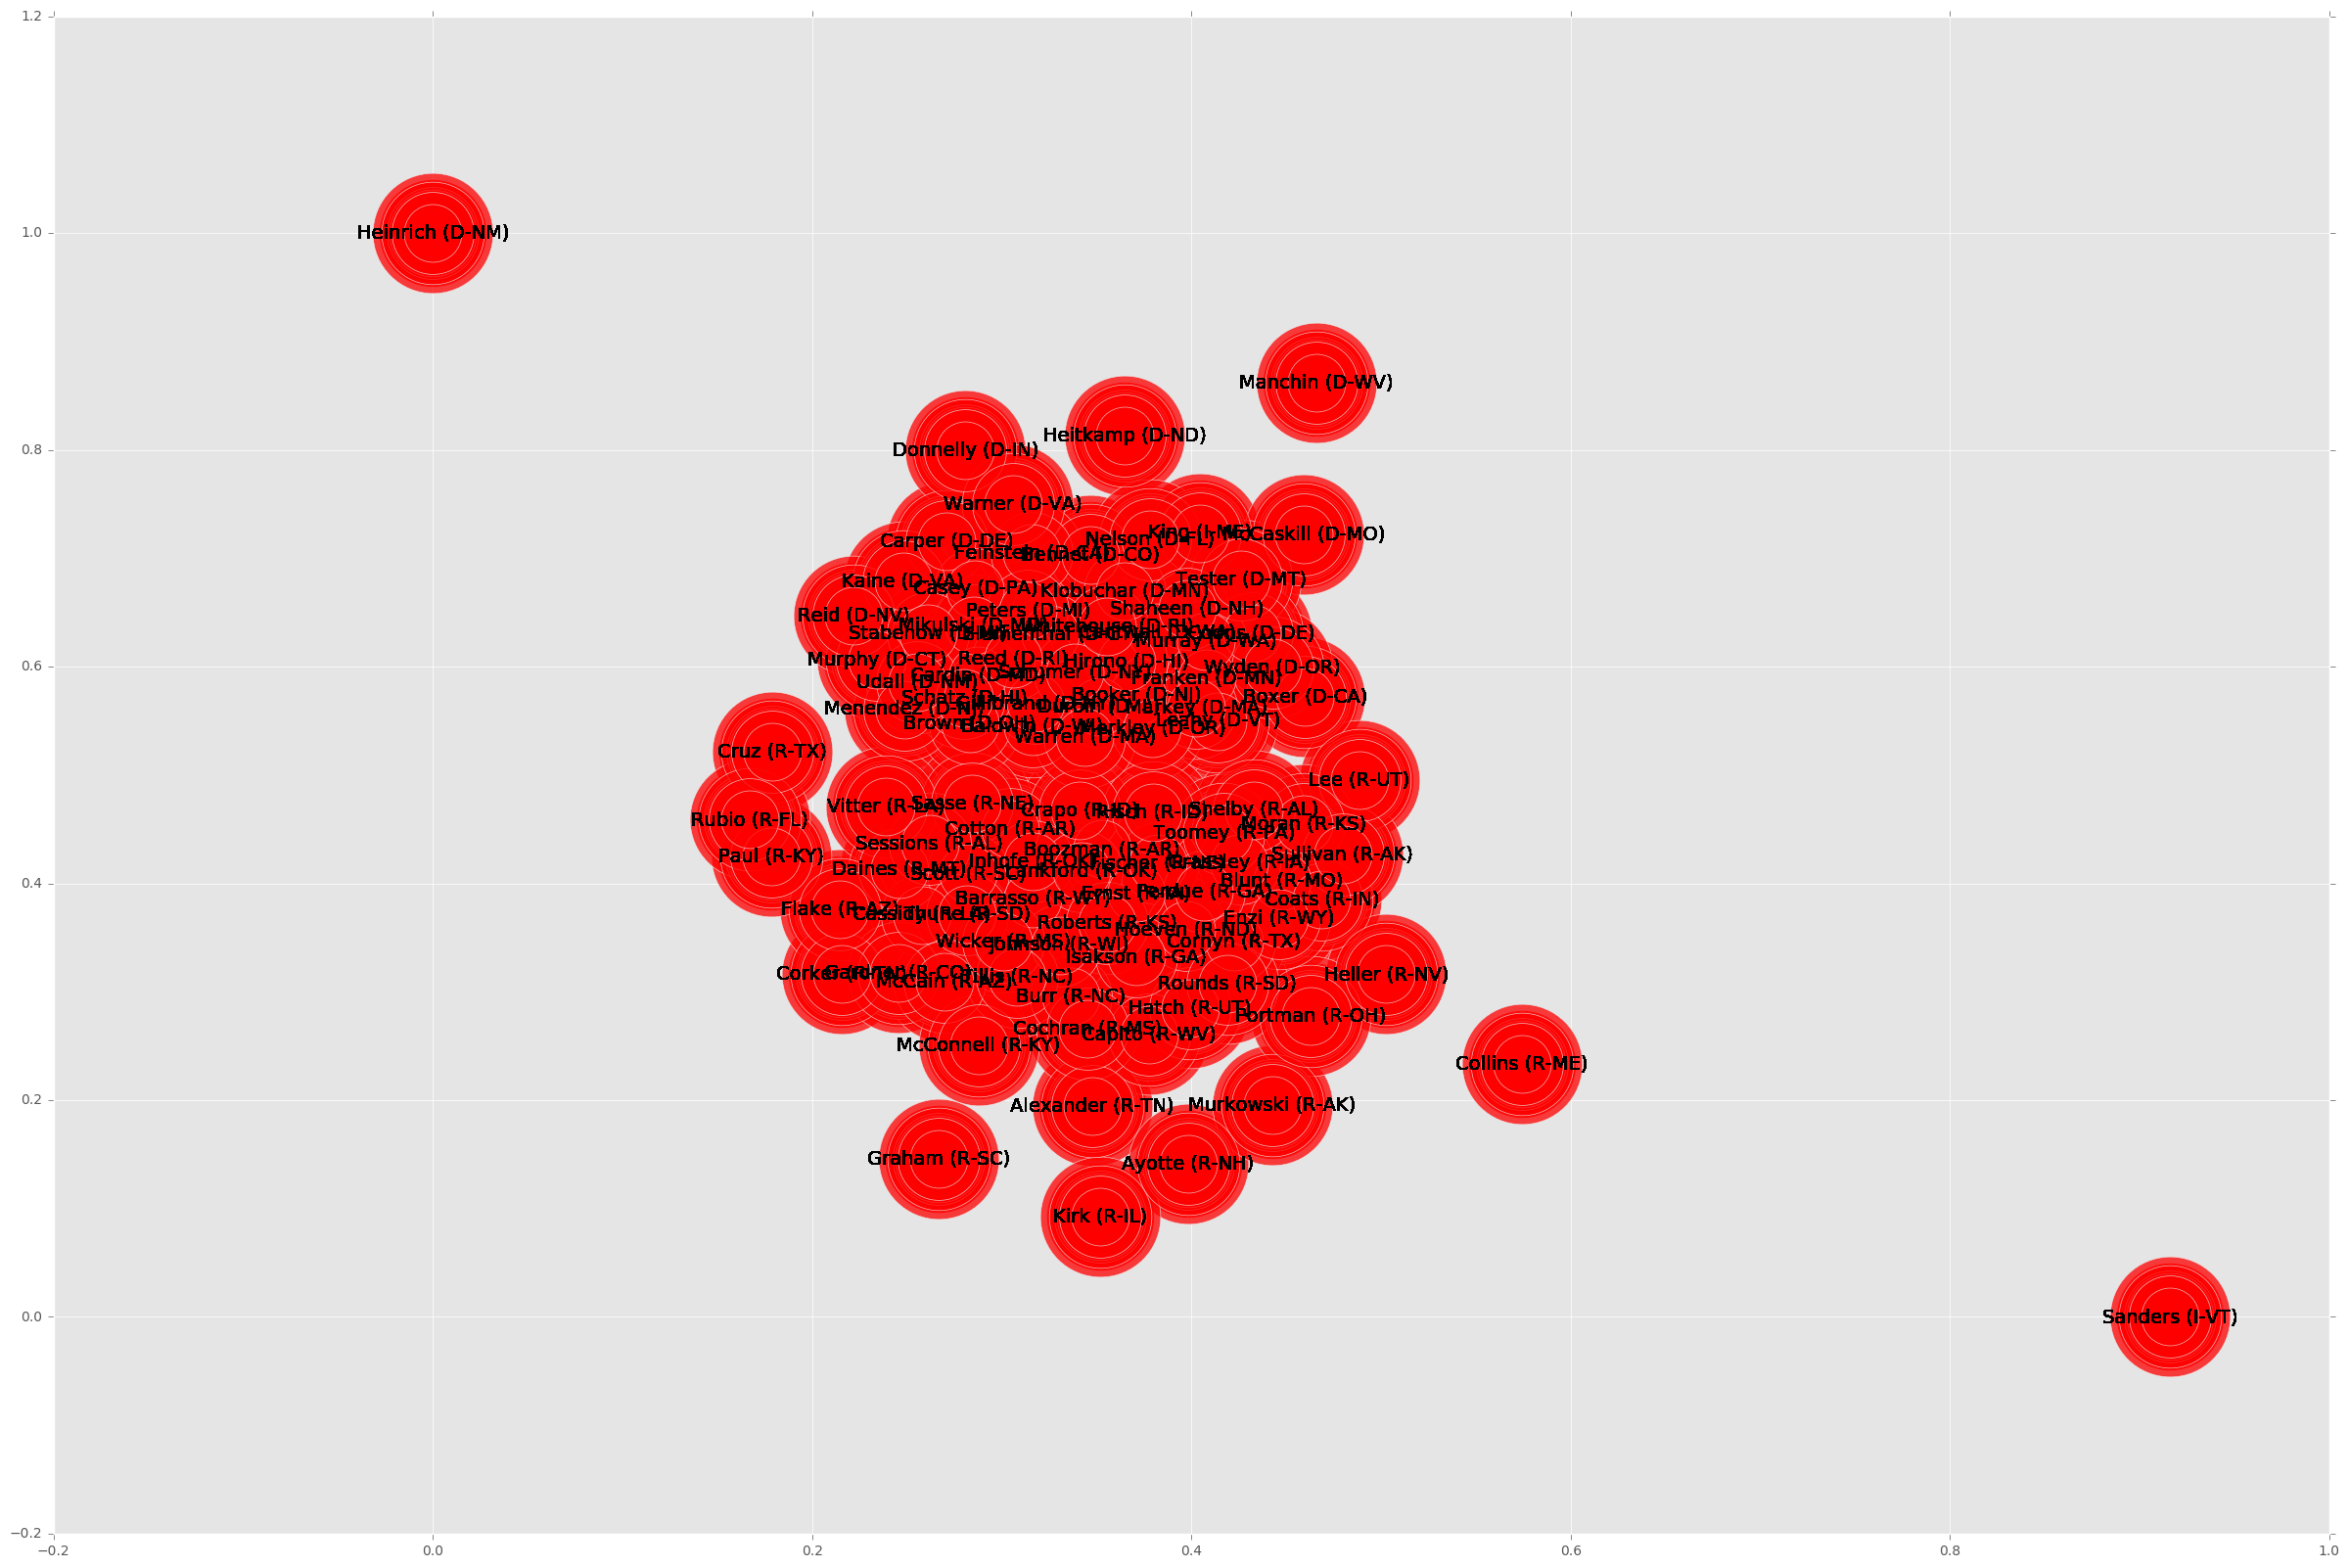

In [74]:
pos = nx.spring_layout(senate)
for key, value in outcome_information.items():
    nx.draw_networkx_nodes(senate, pos, 
                          nodelist = nodes,
                           node_size = 1000*-np.log(value),
                           #node_color = attribute['color'],
                           alpha = 0.75,
                           linewidth = 0
                          )
    nx.draw_networkx_labels(senate, pos, 
                            labels = {name : name for name, node in outcome_information.items()},
                            font_size = 14,
                            alpha = 0.5
                           )


In [85]:
# need to compute pairwise mutual information for edge weights
pairwise_mutual_information = []
for pair in pair_list:
    mi = calc_MI(votes[pair[0]].values, votes[pair[1]].values, 10)
    pairwise_mutual_information.append(mi)
    
#weighted edges
edges_weighted = []
for i, edge in enumerate(edges):
    edges_weighted.append((edge[0], edge[1], (pairwise_mutual_information[i])/.03))
    

In [72]:
#make graph with weighted edges
senate_w = nx.Graph()
senate_w.add_nodes_from(nodes)
senate_w.add_weighted_edges_from(edges_weighted)

edge_width = []
for u, v, d in senate_w.edges(data=True):
    edge_width.append(d['weight'])

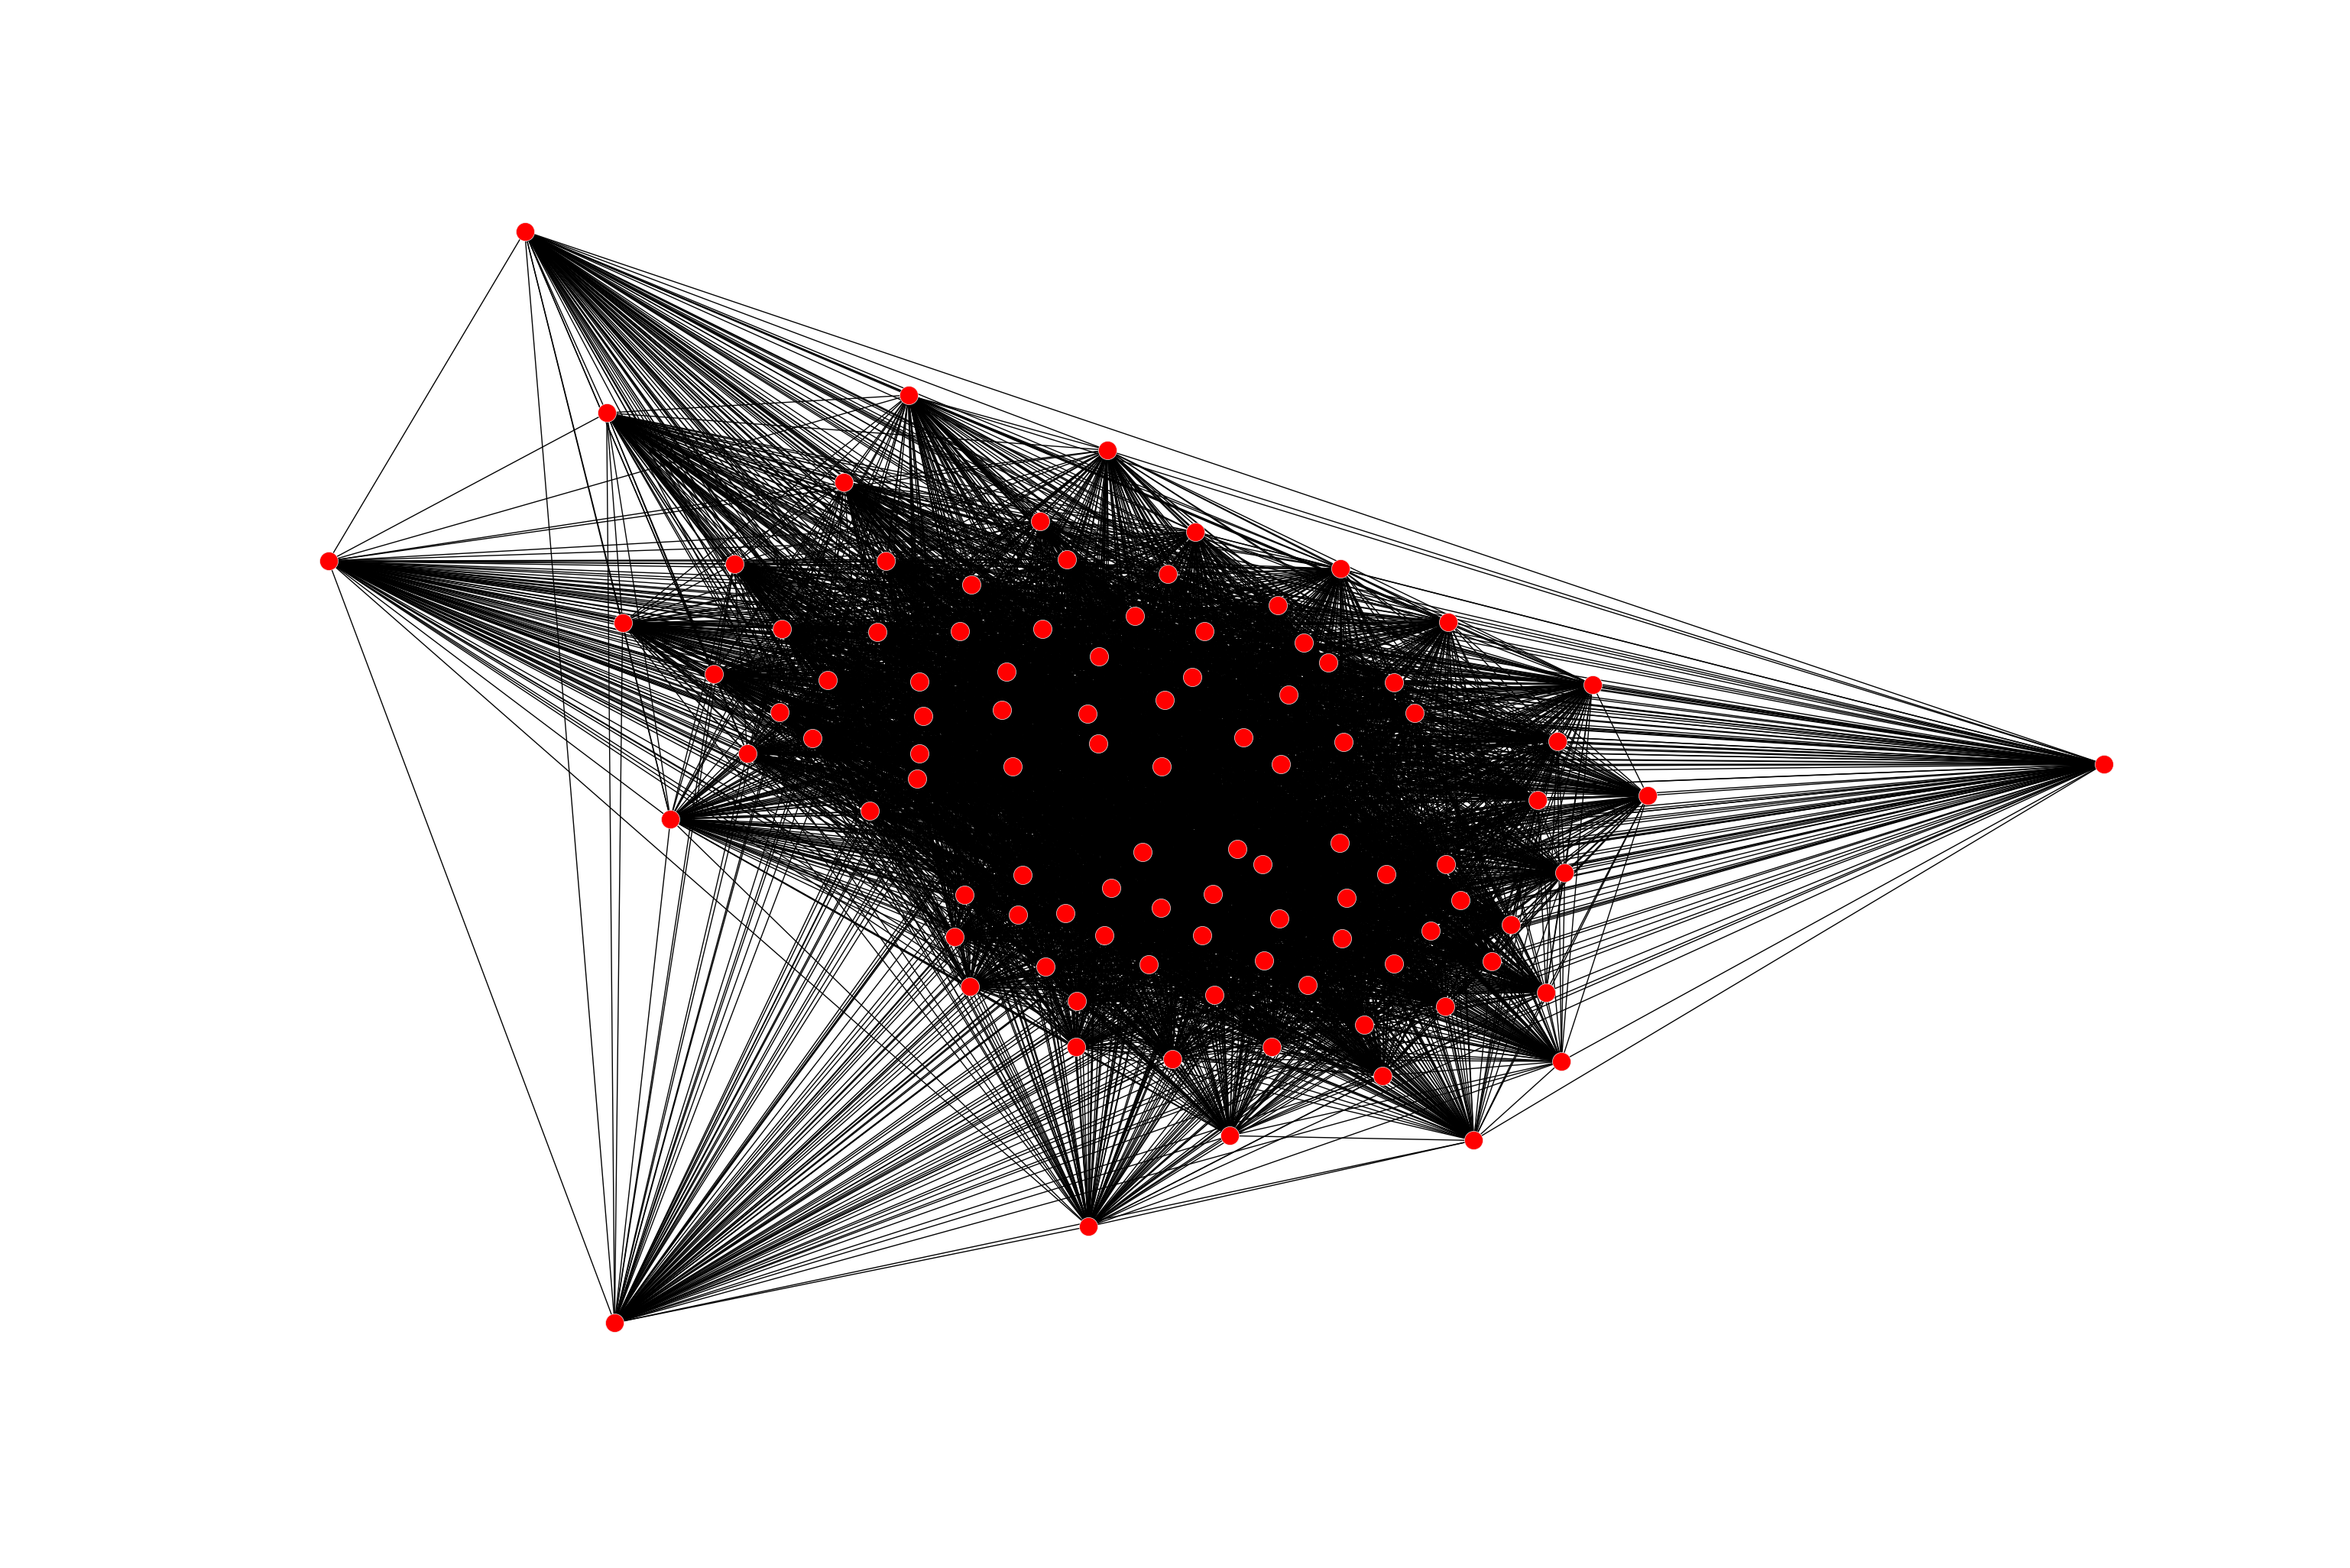

In [73]:
nx.draw(senate_w)

## Parties Influence

In [6]:
# make a list of parties

reps = []
dems = []
ind = []


for name in senators:
    party = name[-5:-4]
    if party == 'D':
        dems.append(name)
    elif party == 'R':
        reps.append(name)
    else:
        ind.append(name)
   

In [8]:
parties=[]
for name in senators:
    parties.append(name[-5:-4])

In [24]:
target = pd.Series(parties).map({'D': 0, 'R': 1, 'I': 0})
target.name = 'Party'
target.index = votes.iloc[:, :-1].T.index

In [34]:
partied = votes.T.join(target)

In [36]:
partied.iloc[:, :-1].head()

1    2    3    4    5    6    7    8    9    10  ...   462  \
Alexander (R-TN)    0    1    1    1    1    1    1    0    0    1 ...     1   
Ayotte (R-NH)       0    1    1    1    1    1    1    0    0    1 ...     1   
Baldwin (D-WI)      1    1    0    0    0    1    0    1    0    1 ...     1   
Barrasso (R-WY)     0    1    1    1    1    1    1    0    1    1 ...     1   
Bennet (D-CO)       0    1    1    0    0    1    0    1    0    1 ...     1   

                  478  487  492  494  496  497  500  501  502  
Alexander (R-TN)    1    1    1    1    1    1    1    1    1  
Ayotte (R-NH)       0    1    0    1    1    1    1    1    1  
Baldwin (D-WI)      1    1    0    1    1    1    1    0    1  
Barrasso (R-WY)     0    1    1    1    1    1    1    1    1  
Bennet (D-CO)       1    1    0    1    1    1    1    1    1  

[5 rows x 438 columns]

In [27]:
X = votes.iloc[:, :-1].values.T
y = target.values

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

rfc = DecisionTreeClassifier()
gbc = GradientBoostingClassifier(verbose=1)

Mutual information between party and senator